In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [96]:
import numpy as  np

In [35]:
IMAGE_SIZE=256
BATCH_SIZE=32
EPOCHS=50

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    

)

Found 1200 files belonging to 3 classes.


In [6]:
class_names=dataset.class_names

In [8]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

38

In [19]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy().shape)
    print(label_batch[0].numpy())
    

(256, 256, 3)
1


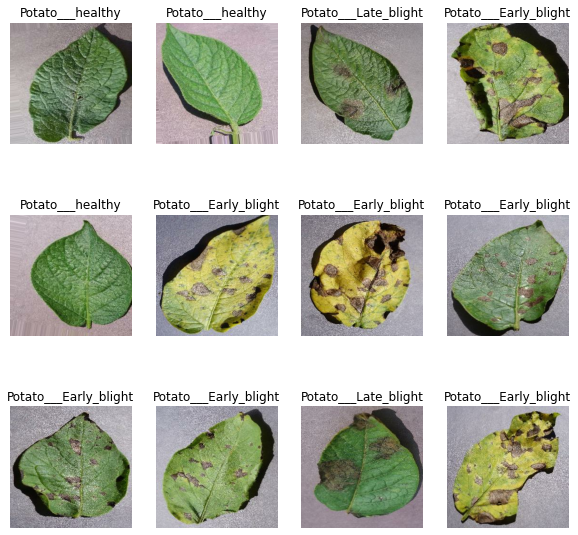

In [34]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint"))
        plt.title(class_names[label_batch[i].numpy()])
        plt.axis("off")

In [36]:
len(dataset)

38

In [41]:
train_size=int(len(dataset)*0.8)

In [42]:
train_size

30

In [43]:
tain_data=dataset.take(train_size)

In [44]:
test_data=dataset.skip(train_size)

In [45]:
len(test_data)

8

In [48]:
val_size=int(len(dataset)*0.1)

In [49]:
val_size

3

In [50]:
val_data=test_data.take(val_size)

In [51]:
test_data=test_data.skip(val_size)

In [52]:
len(test_data)

5

In [60]:
def train_test_split(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    data_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*data_size)
    val_size=int(val_split*data_size)
    
    train_data=ds.take(train_size)
    val_data=ds.skip(train_size).take(val_size)
    test_data=ds.skip(train_size).skip(val_size)
    
    return train_data,val_data,test_data
    

In [61]:
train_data,val_data,test_data=train_test_split(dataset)

In [62]:
len(train_data)

30

In [63]:
len(val_data)

3

In [64]:
len(test_data)

5

In [66]:
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data=val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [68]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
    
])

In [71]:
#change the image for different angles to identify
data_augmentaion=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

In [79]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
n_classes=3#There are three classes in leaf(early,late and normal)
model=models.Sequential([
    resize_and_rescale,
    data_augmentaion,
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),#trasform mateix into one column matrix
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax"),
    
])

In [80]:
model.build(input_shape=input_shape)

In [82]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [83]:
model.compile(optimizer='adam',
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [84]:
history=model.fit(
    train_data,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_data
)

Epoch 1/50
30/30 [==============================] - 113s 4s/step - loss: 1.0931 - accuracy: 0.3570 - val_loss: 1.0383 - val_accuracy: 0.3750
Epoch 2/50
30/30 [==============================] - 101s 3s/step - loss: 0.8233 - accuracy: 0.5720 - val_loss: 0.5969 - val_accuracy: 0.6771
Epoch 3/50
30/30 [==============================] - 102s 3s/step - loss: 0.5206 - accuracy: 0.7511 - val_loss: 0.5084 - val_accuracy: 0.8125
Epoch 4/50
30/30 [==============================] - 101s 3s/step - loss: 0.4758 - accuracy: 0.8040 - val_loss: 0.4745 - val_accuracy: 0.8021
Epoch 5/50
30/30 [==============================] - 101s 3s/step - loss: 0.4113 - accuracy: 0.8114 - val_loss: 0.4975 - val_accuracy: 0.6771
Epoch 6/50
30/30 [==============================] - 99s 3s/step - loss: 0.4452 - accuracy: 0.8051 - val_loss: 0.3930 - val_accuracy: 0.8333
Epoch 7/50
30/30 [==============================] - 99s 3s/step - loss: 0.3936 - accuracy: 0.8273 - val_loss: 0.4561 - val_accuracy: 0.8021
Epoch 8/50
30/3

In [85]:
print(3)

3


In [86]:
score=model.evaluate(test_data)

5/5 [==============================] - 8s 1s/step - loss: 0.2619 - accuracy: 0.8813


In [87]:
score

[0.26186299324035645, 0.8812500238418579]

In [88]:
history

In [89]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 30}

In [90]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [92]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation loss')

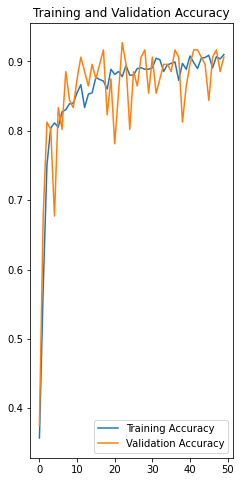

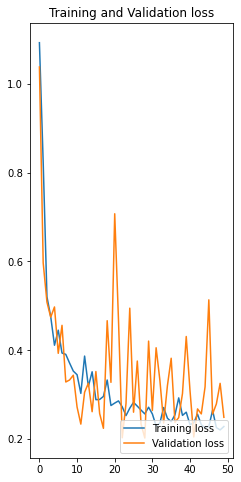

In [95]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")


plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label="Training loss")
plt.plot(range(EPOCHS),val_loss,label="Validation loss")
plt.legend(loc="lower right")
plt.title("Training and Validation loss")


first image prediction
actual label:  Potato___healthy
1/1 [==============================] - 1s 966ms/step
[[7.25771359e-04 1.82217777e-01 8.17056417e-01]
 [1.21919322e-04 2.06396103e-01 7.93481946e-01]
 [8.27633858e-01 1.72366068e-01 7.25902822e-08]
 [9.99999404e-01 6.32657873e-07 4.19115744e-19]
 [9.16336649e-05 2.90960163e-01 7.08948255e-01]
 [1.00000000e+00 1.66335945e-10 3.47002396e-19]
 [1.00000000e+00 3.66368769e-10 8.97859621e-22]
 [9.99997258e-01 2.75780417e-06 3.93660094e-13]
 [9.99999881e-01 1.27222904e-07 1.47716149e-13]
 [9.99992013e-01 8.04600677e-06 3.91183559e-13]
 [2.59106513e-04 9.99735773e-01 5.08989433e-06]
 [9.99999881e-01 1.48261108e-07 2.87082110e-18]
 [3.11868973e-07 9.99999642e-01 2.02163828e-12]
 [2.75730359e-04 9.99724209e-01 4.58547600e-09]
 [4.44421661e-04 1.90403327e-01 8.09152186e-01]
 [9.99970555e-01 2.94969504e-05 1.22921082e-15]
 [1.00000000e+00 1.49277934e-09 1.29510313e-12]
 [1.00000000e+00 5.07424935e-10 7.08955581e-21]
 [1.58299389e-03 9.98417020e

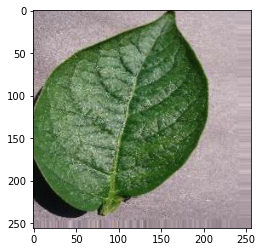

In [110]:
for images_batch, labels_batch in test_data.take(1):
    
    first_image=images_batch[30].numpy().astype("uint8")
    first_label=labels_batch[30].numpy()
    
    print("first image prediction")
    plt.imshow(first_image)
    print("actual label: ",class_names[first_label])
    
    batch_prediction=model.predict(image_batch)
    print(batch_prediction)
    print("predicted label: ",class_names[np.argmax(batch_prediction[30])])

In [107]:
class_names[np.argmax(batch_prediction[20])]

'Potato___healthy'

In [111]:
def predict(model,img):
    img_array=tf.keras.prprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img,array)
    
    predicton=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(batch_prediction[0])]
    return predicted_class

In [115]:
model_version=1
model.save(f"../models/{model_version}")#Sava tensrflow model

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [116]:
import os
os.listdir("../models")

['1']

In [117]:
print(3)

3


In [9]:
tf.__version__

'2.9.1'

In [1]:
print(5)

5


In [8]:
import tensorflow as tf

In [11]:
import numpy

In [12]:
numpy.__version__

'1.21.5'